<a href="https://colab.research.google.com/github/Ololade3/SGA_1_4/blob/main/Assignment_week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data can be found here.

Data Dictionary
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



Objective
Predict whether a person makes over 50K a year.

Qs 1. Build a machine learning model that predicts the salary.
Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

In [ ]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext nb_black

In [ ]:
# Read data
file_path =r"C:\Users\hp\Desktop\salary.csv"
df = pd.read_csv(file_path)

# Copy data
data = df.copy()

# View first five rows
data.head()


,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
# Checking the variables obj type

data.dtypes

Age                int64
Workclass         object
Final_weight       int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Country           object
Salary            object
dtype: object

In [ ]:
# Checking for null values

data.isna().sum()

Age               0
Workclass         0
Final_weight      0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Country           0
Salary            0
dtype: int64

In [ ]:
# Statistical distribution of the numeric variables

data.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Distribution of the categorical variables

data.describe(include=["O"])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country,Salary
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [ ]:
# Separate numeric and categorical features
num_data = data.select_dtypes(exclude="O")
cat_data = data.select_dtypes(include="O")

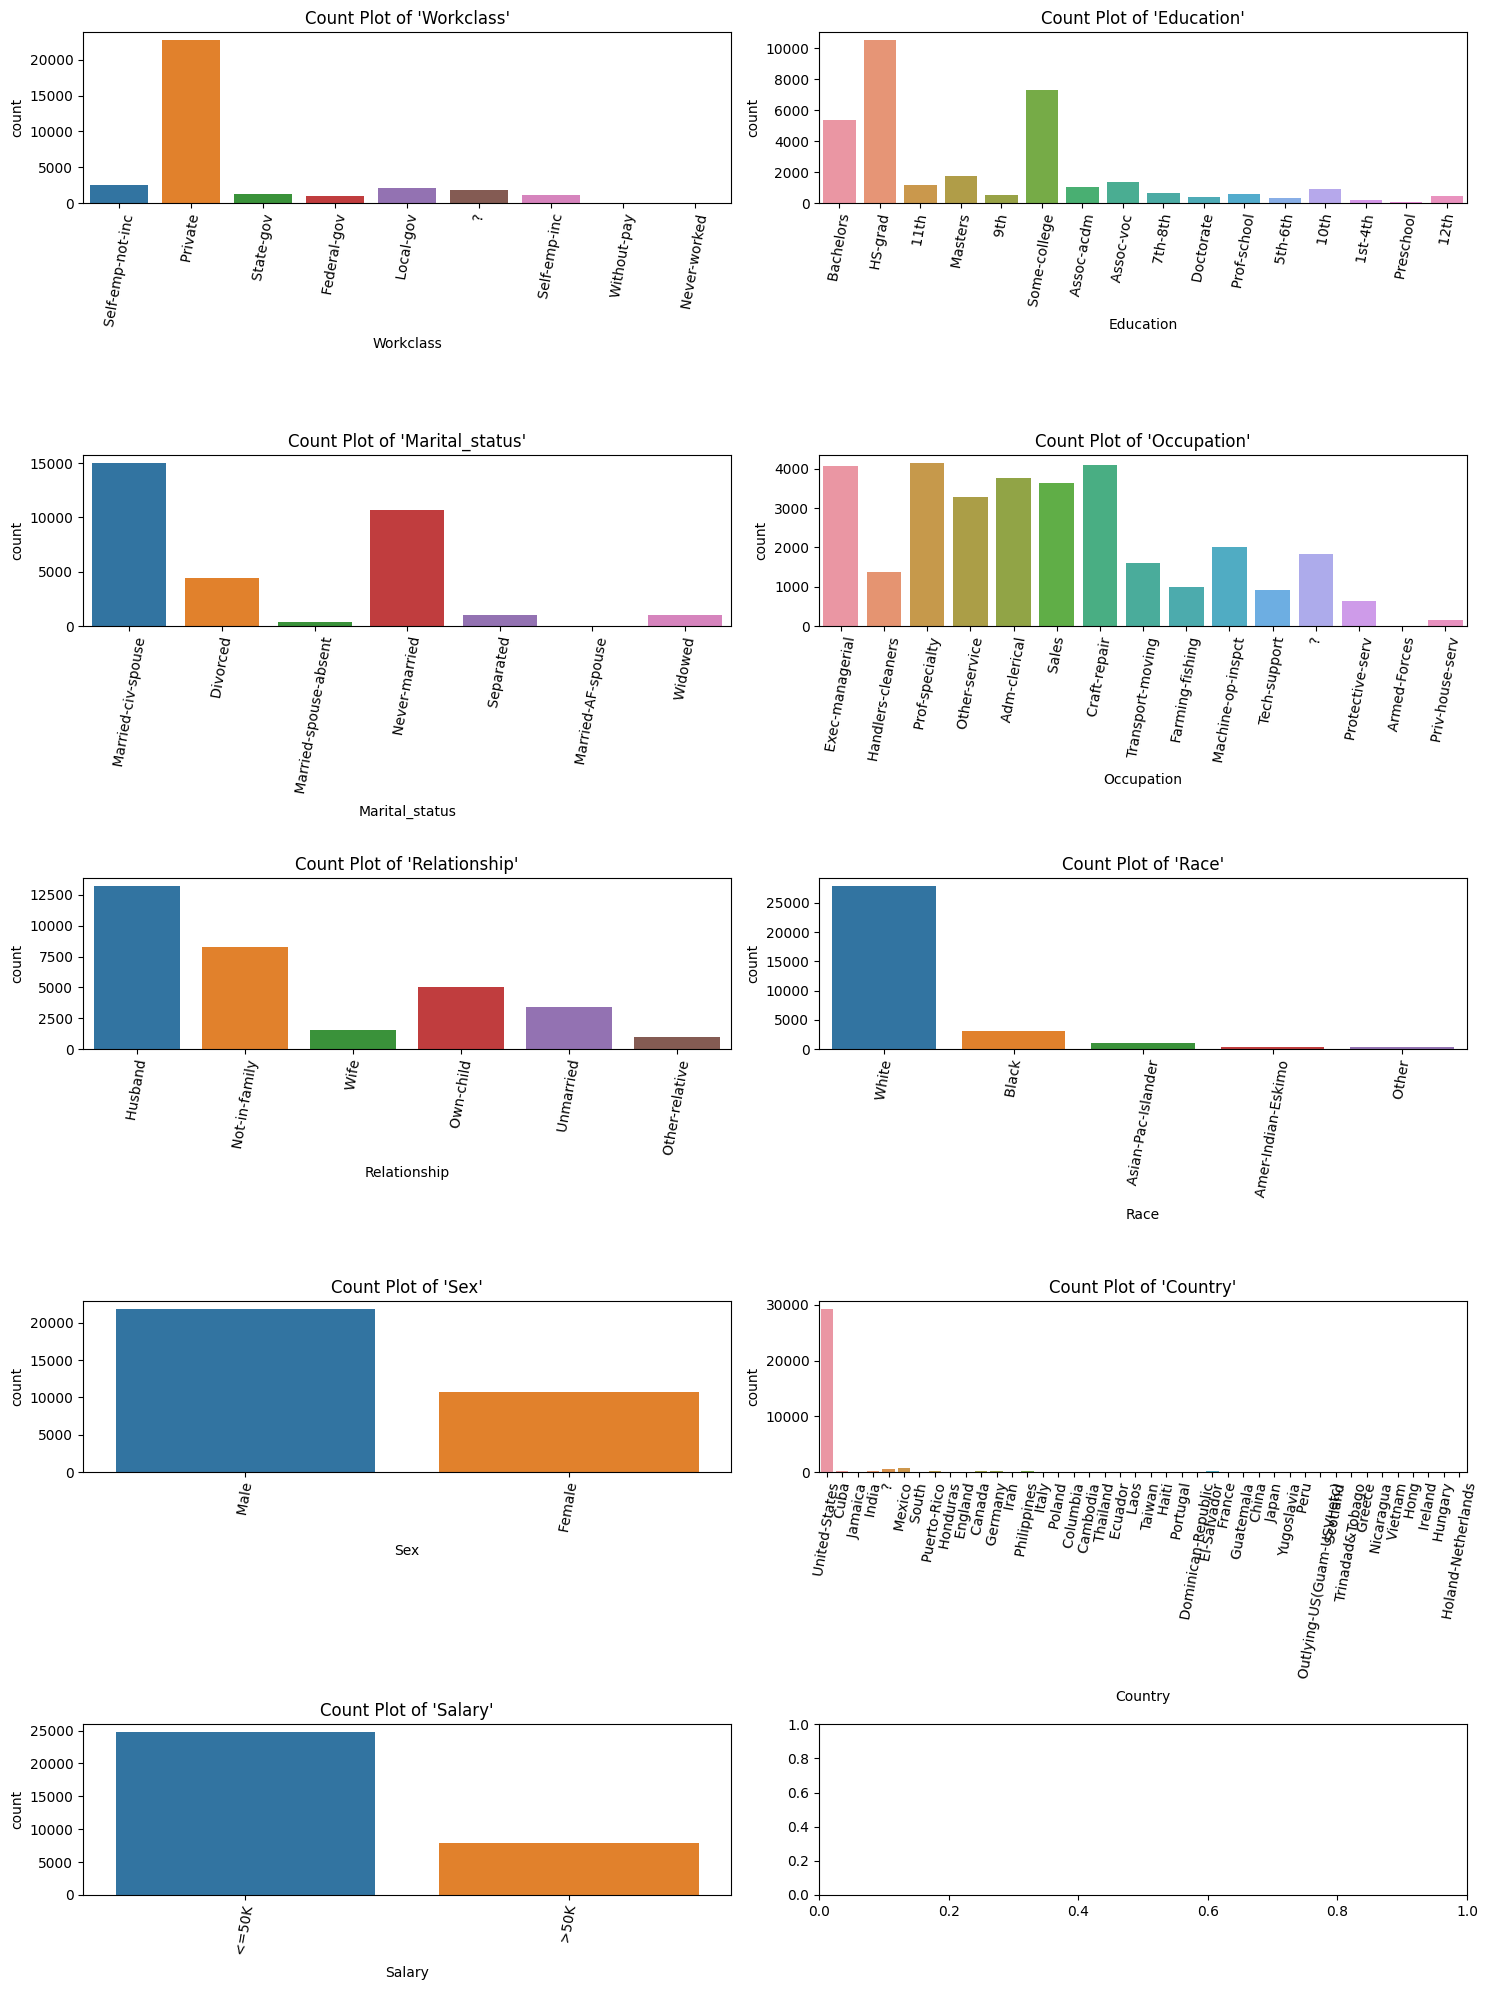

In [ ]:
# Count plot


def plot_(
    data: pd.DataFrame,
    features: list[str],
    rows_num: int,
    cols_num: int,
    figsize: tuple,
) -> "Plot":
    """This returns a count plot of all the categorical variables"""
    fig, axs = plt.subplots(rows_num, cols_num, figsize=figsize)

    for idx, feat in enumerate(data.columns):
        if rows_num > 1:
            ax = axs[(idx // cols_num), (idx % cols_num)]
        else:
            ax = axs[idx]

        sns.countplot(data=data, x=feat, ax=ax)
        ax.set_title(f"Count Plot of {feat!r}")

        labels = sorted(data[feat].value_counts().index)
        ax.tick_params(axis="x", rotation=80)

    fig.tight_layout()
    plt.show()


# Display plot
plot_(
    data=cat_data, features=cat_data.columns, rows_num=5, cols_num=2, figsize=(15, 20)
)

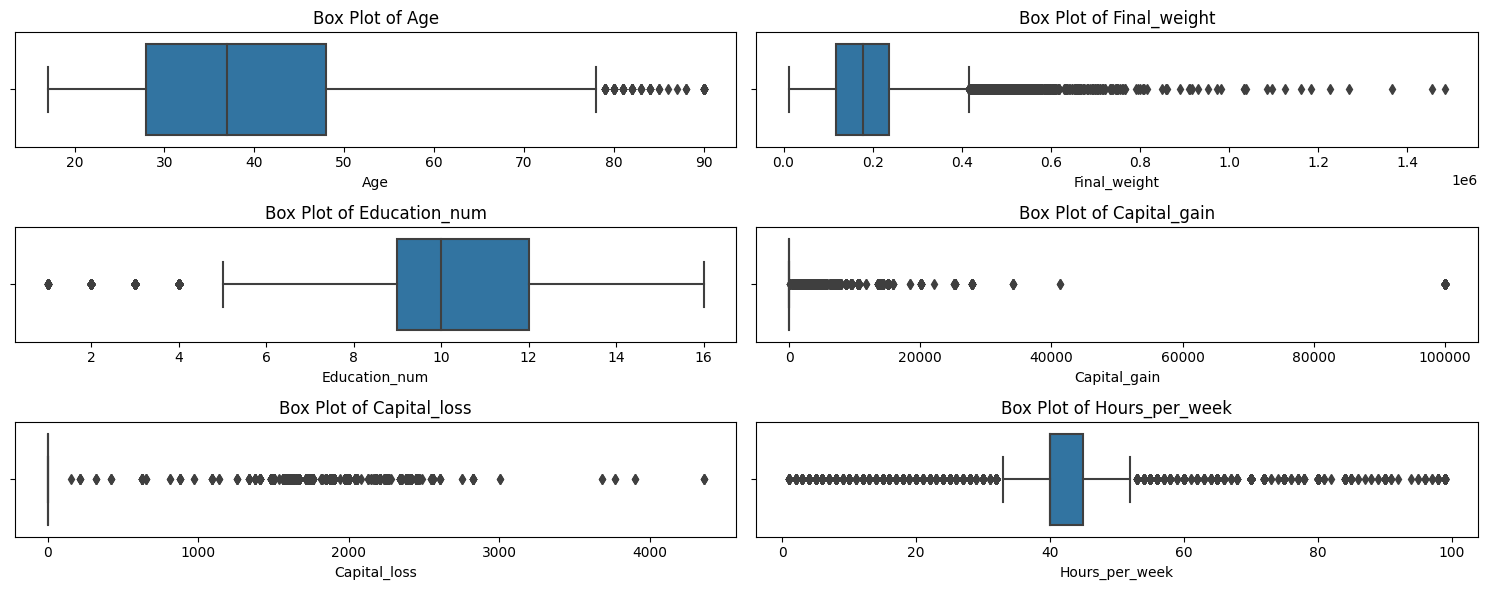

In [ ]:
#Box Plot

rows_num, cols_num = 3, 2

fig, axs = plt.subplots(rows_num, cols_num, figsize=(15, 6))

for idx, var in enumerate(num_data.columns):
    if rows_num > 1:
        ax = axs[(idx // cols_num), (idx % cols_num)]
    else:
        ax = axs[idx]

    sns.boxplot(data=data, x=var, ax=ax)
    ax.set_title(f"Box Plot of {var}")

fig.tight_layout()
plt.show()

In [ ]:
# Removing white spaces from each the categorical labels
for var in cat_data.columns:
    data[var] = cat_data[var].apply(lambda x: x.strip())

In [ ]:
 #Verify

data["Workclass"].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
# Replace `?` with the most occurred value
feat = ["Workclass", "Occupation", "Country"]

for x in data[feat]:
    most_occ = data[x].mode().values[0]
    data[x].replace("?", most_occ, inplace=True)

In [ ]:
# Drop Education_num because it's the same as Education
data.drop(columns="Education_num", inplace=True)

In [ ]:
RANDOMSTATE = 123
TESTSIZE = 0.2
TARGET = "Salary"

from sklearn.model_selection import train_test_split

# Independent variable (matrix)
X = data.drop(columns=TARGET)

# Target variable (Vector)
y = data[TARGET]

# Split X & y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TESTSIZE, random_state=RANDOMSTATE)

#Shape: Train, Test
print(f"'Independent feature':{X_train.shape}, {X_test.shape}, \n'Target features:' {y_train.shape}, {y_test.shape}")

'Independent feature':(26048, 13), (6512, 13), 
'Target features:' (26048,), (6512,)


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# VTS: Variables to scale
VTS = [
    "Age",
    "Final_weight",
    "Capital_gain",
    "Capital_loss",
    "Hours_per_week",
]

# VTE: Variables to encode
VTE = [
    "Workclass",
    "Education",
    "Marital_status",
    "Occupation",
    "Relationship",
    "Race",
    "Sex",
    "Country",
]

In [ ]:
# One Hot Encode
ohe = OneHotEncoder(dtype=int, handle_unknown="ignore")

# Scale
scaler = MinMaxScaler()


col_trans = ColumnTransformer(
    transformers=[("ohe", ohe, VTE), ("scaler", scaler, VTS)], remainder="passthrough"
)

col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 OneHotEncoder(dtype=<class 'int'>,
                                               handle_unknown='ignore'),
                                 ['Workclass', 'Education', 'Marital_status',
                                  'Occupation', 'Relationship', 'Race', 'Sex',
                                  'Country']),
                                ('scaler', MinMaxScaler(),
                                 ['Age', 'Final_weight', 'Capital_gain',
                                  'Capital_loss', 'Hours_per_week'])])

In [ ]:
train = col_trans.fit_transform(X_train)
train = train.toarray()

In [ ]:
train_df = pd.DataFrame(train, columns=col_trans.get_feature_names_out())
train_df.head()

,ohe__Workclass_Federal-gov,ohe__Workclass_Local-gov,ohe__Workclass_Never-worked,ohe__Workclass_Private,ohe__Workclass_Self-emp-inc,ohe__Workclass_Self-emp-not-inc,ohe__Workclass_State-gov,ohe__Workclass_Without-pay,ohe__Education_10th,ohe__Education_11th,ohe__Education_12th,ohe__Education_1st-4th,ohe__Education_5th-6th,ohe__Education_7th-8th,ohe__Education_9th,ohe__Education_Assoc-acdm,ohe__Education_Assoc-voc,ohe__Education_Bachelors,ohe__Education_Doctorate,ohe__Education_HS-grad,ohe__Education_Masters,ohe__Education_Preschool,ohe__Education_Prof-school,ohe__Education_Some-college,ohe__Marital_status_Divorced,ohe__Marital_status_Married-AF-spouse,ohe__Marital_status_Married-civ-spouse,ohe__Marital_status_Married-spouse-absent,ohe__Marital_status_Never-married,ohe__Marital_status_Separated,ohe__Marital_status_Widowed,ohe__Occupation_Adm-clerical,ohe__Occupation_Armed-Forces,ohe__Occupation_Craft-repair,ohe__Occupation_Exec-managerial,ohe__Occupation_Farming-fishing,ohe__Occupation_Handlers-cleaners,ohe__Occupation_Machine-op-inspct,ohe__Occupation_Other-service,ohe__Occupation_Priv-house-serv,ohe__Occupation_Prof-specialty,ohe__Occupation_Protective-serv,ohe__Occupation_Sales,ohe__Occupation_Tech-support,ohe__Occupation_Transport-moving,ohe__Relationship_Husband,ohe__Relationship_Not-in-family,ohe__Relationship_Other-relative,ohe__Relationship_Own-child,ohe__Relationship_Unmarried,ohe__Relationship_Wife,ohe__Race_Amer-Indian-Eskimo,ohe__Race_Asian-Pac-Islander,ohe__Race_Black,ohe__Race_Other,ohe__Race_White,ohe__Sex_Female,ohe__Sex_Male,ohe__Country_Cambodia,ohe__Country_Canada,ohe__Country_China,ohe__Country_Columbia,ohe__Country_Cuba,ohe__Country_Dominican-Republic,ohe__Country_Ecuador,ohe__Country_El-Salvador,ohe__Country_England,ohe__Country_France,ohe__Country_Germany,ohe__Country_Greece,ohe__Country_Guatemala,ohe__Country_Haiti,ohe__Country_Holand-Netherlands,ohe__Country_Honduras,ohe__Country_Hong,ohe__Country_Hungary,ohe__Country_India,ohe__Country_Iran,ohe__Country_Ireland,ohe__Country_Italy,ohe__Country_Jamaica,ohe__Country_Japan,ohe__Country_Laos,ohe__Country_Mexico,ohe__Country_Nicaragua,ohe__Country_Outlying-US(Guam-USVI-etc),ohe__Country_Peru,ohe__Country_Philippines,ohe__Country_Poland,ohe__Country_Portugal,ohe__Country_Puerto-Rico,ohe__Country_Scotland,ohe__Country_South,ohe__Country_Taiwan,ohe__Country_Thailand,ohe__Country_Trinadad&Tobago,ohe__Country_United-States,ohe__Country_Vietnam,ohe__Country_Yugoslavia,scaler__Age,scaler__Final_weight,scaler__Capital_gain,scaler__Capital_loss,scaler__Hours_per_week
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.041096,0.106341,0.0,0.0,0.193878
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.068493,0.175324,0.0,0.0,0.397959
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260274,0.267151,0.0,0.0,0.346939
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,

Model Building
Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Initialize
logit = LogisticRegression(random_state=RANDOMSTATE, max_iter=180)

# Pipeline
pipe_logit = Pipeline(
    steps=[
        # ===== Column Transformer =====
        ("col_transformer", col_trans),
        # ===== log Model =====
        ("logit", logit),
    ]
)

pipe_logit

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week'])])),
                ('logit', LogisticRegression(max_iter=180, random_state=123))])

In [ ]:
# Fit
pipe_logit.fit(X_train, y_train)

# Prediction
y_pred = pipe_logit.predict(X_test)

# Probability
y_prob = pipe_logit.predict_proba(X_test)[:, 1]

C:\Users\hp\.conda\envs\mlflow_env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Accuracy

np.mean(y_test == y_pred)

0.859029484029484

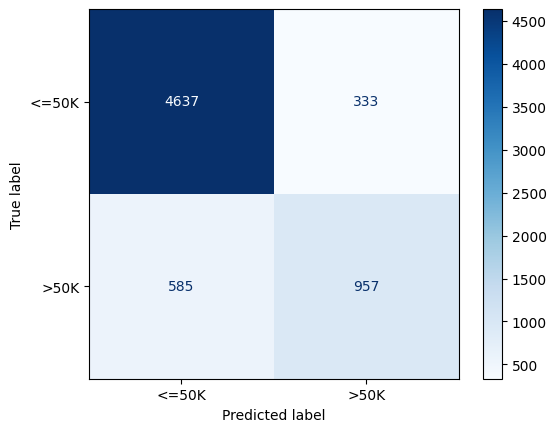

In [ ]:
# Confusion Matrix

labels = ["<=50K", ">50K"]

conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
conf_matrix

plot_ = metrics.ConfusionMatrixDisplay(conf_matrix, display_labels=labels)
plot_.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
# Classification report

clf_report = metrics.classification_report(y_test, y_pred)

print(clf_report)

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4970
        >50K       0.74      0.62      0.68      1542

    accuracy                           0.86      6512
   macro avg       0.81      0.78      0.79      6512
weighted avg       0.85      0.86      0.85      6512



In [ ]:
# AUC

auc_score = metrics.roc_auc_score(y_true=y_test, y_score=y_prob)
auc_score

0.9077139882094118

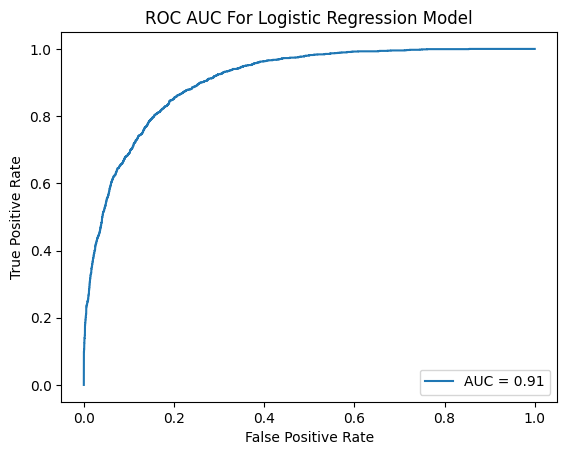

In [ ]:
# AUC curve

fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_prob, pos_label=">50K"
)

auc_score = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_prob, pos_label=">50K"
)

auc_score = metrics.auc(fpr, tpr)
auc_score

0.9077139882094118

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize
logit = LogisticRegression(random_state=RANDOMSTATE)

# Pipeline
pipe_dec_tree = Pipeline(
    steps=[
        # Column Transformer
        ("col_transformer", col_trans),
        # log Model
        ("logit", DecisionTreeClassifier(random_state=RANDOMSTATE)),
    ]
)

pipe_dec_tree

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(dtype=<class 'int'>,
                                                                handle_unknown='ignore'),
                                                  ['Workclass', 'Education',
                                                   'Marital_status',
                                                   'Occupation', 'Relationship',
                                                   'Race', 'Sex', 'Country']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Final_weight',
                                                   'Capital_gain',
                                                   'Capital_loss',
                                                   'Hours_per_week'])])),
                ('logit', DecisionTreeClassifier(random_state=123))])

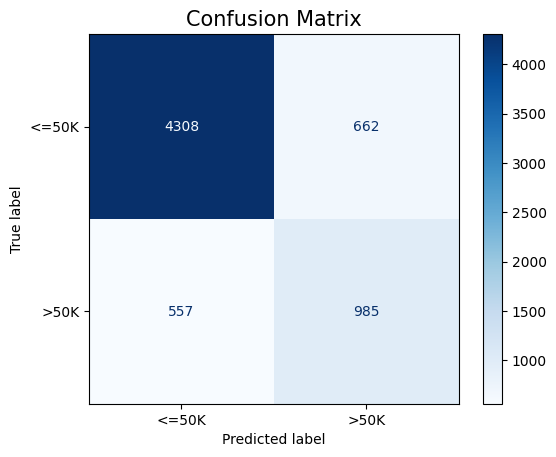

In [ ]:
# Fit
pipe_dec_tree.fit(X_train, y_train)

# Predict
y_pred_2 = pipe_dec_tree.predict(X_test)

# Probability
y_proba_D = pipe_dec_tree.predict_proba(X_test)[:, 1]

# Confusion matix
conf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_2)

disp = metrics.ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix, display_labels=labels
)
# Show confusion matix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix", size=15)
plt.show()

In [ ]:
# Classification Report
report = metrics.classification_report(y_true=y_test, y_pred=y_pred_2)

print(report)

              precision    recall  f1-score   support

       <=50K       0.89      0.87      0.88      4970
        >50K       0.60      0.64      0.62      1542

    accuracy                           0.81      6512
   macro avg       0.74      0.75      0.75      6512
weighted avg       0.82      0.81      0.81      6512



In [ ]:
# AUC

auc_score_D = metrics.roc_auc_score(y_true=y_test, y_score=y_proba_D)
auc_score_D

0.7527908044897138

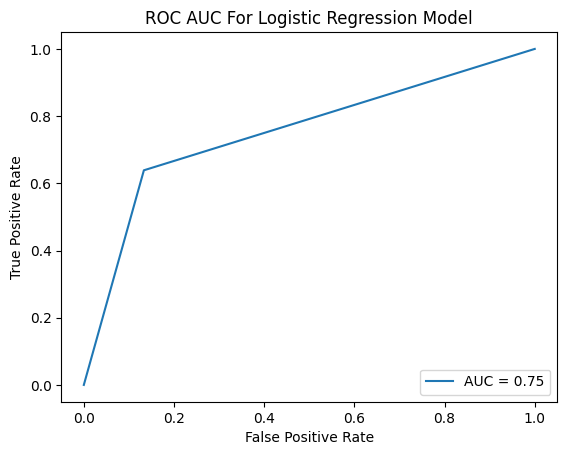

In [ ]:
# AUC curve
fpr, tpr, thresholds = metrics.roc_curve(
    y_true=y_test, y_score=y_proba_D, pos_label=">50K"
)

auc_score_D = metrics.auc(fpr, tpr)
auc_score_D

display = metrics.RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=auc_score_D, estimator_name=None
)
display.plot()
plt.title("ROC AUC For Logistic Regression Model")

plt.show()


In [ ]:
unseen_data = {
    "Age": 51,
    "Workclass": "Self-emp-not-inc",
    "Final_weight": 170086,
    "Education": "Bachelors",
    "Education_num": 13,
    "Marital_status": "Married-civ-spouse",
    "Occupation": "Tech-support",
    "Relationship": "Husband",
    "Race": "Exec-White",
    "Sex": "Male",
    "Capital_gain": 0,
    "Capital_loss": 0,
    "Hours_per_week": 45,
    "Country": "United-States",
}

sn_df = pd.DataFrame(data=unseen_data, index=[0])
sn_df.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country
0,51,Self-emp-not-inc,170086,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Exec-White,Male,0,0,45,United-States


In [ ]:
# Logit regression
result = pipe_logit.predict(sn_df)[0]
result

'>50K'